In [3]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
figsize(12.5, 8)

import matplotlib.pyplot as plt

In [4]:
scores = pd.read_csv("../data/Scores 7 Wonders - Scores.csv")
scores["Rang relatif"] = -(scores["Rang relatif"].str[:-1].astype(float) / 100)
scores.head()

,Partie,Nb joueurs,Date,Extension,Joueur,Ville,Côté,Rouge,Argent,Merveille,Bleu,Jaune,Violet,Vert,Leaders,Total,Rang,Rang relatif,Vainqueur
0,1,4,NaN,base,S,NaN,NaN,1,4,10,5,7,0,10,NaN,37,4,-1.00,0
1,1,4,NaN,base,L,NaN,NaN,-6,3,10,13,0,7,13,NaN,40,3,-0.67,0
2,1,4,NaN,base,C,NaN,NaN,13,1,10,9,3,9,4,NaN,49,2,-0.33,0
3,1,4,NaN,base,A,NaN,NaN,12,1,10,26,3,9,0,NaN,61,1,-0.00,1
4,2,5,24/10/2015,base,A,NaN,NaN,-5,3,10,12,0,9,21,NaN,50,3,-0.50,0


In [28]:
colours = scores[['Partie', 'Joueur',
       'Rouge', 'Argent', 'Merveille', 'Bleu', 'Jaune', 'Violet', 'Vert',
       'Leaders']]
partie_joueur = colours.groupby(["Partie", "Joueur"]).agg("sum")
relatives = partie_joueur.groupby(level=0).apply(lambda x: x - x.mean())
relatives.head(10)

Rouge  Argent  Merveille   Bleu  Jaune  Violet   Vert  Leaders
Partie Joueur                                                                
1      A         7.0   -1.25       0.00  12.75  -0.25    2.75  -6.75      NaN
       C         8.0   -1.25       0.00  -4.25  -0.25    2.75  -2.75      NaN
       L       -11.0    0.75       0.00  -0.25  -3.25    0.75   6.25      NaN
       S        -4.0    1.75       0.00  -8.25   3.75   -6.25   3.25      NaN
2      A       -11.0    0.00       0.00   3.00  -3.20    1.20   9.60      NaN
       C        -4.0    1.00       0.00  -5.00  -0.20   10.20 -10.40      NaN
       L        -5.0   -1.00       0.00  -5.00  -3.20   -7.80  14.60      NaN
       S        10.0   -2.00       0.00  -1.00   0.80    4.20  -2.40      NaN
       Y        10.0    2.00       0.00   8.00   5.80   -7.80 -11.40      NaN
3      A       -11.5   -0.50       3.75   8.25   0.25    8.00  -6.25      NaN

In [34]:
relatives.reset_index().head()

,Partie,Joueur,Rouge,Argent,Merveille,Bleu,Jaune,Violet,Vert,Leaders
0,1,A,7,-1.25,0,12.75,-0.25,2.75,-6.75,NaN
1,1,C,8,-1.25,0,-4.25,-0.25,2.75,-2.75,NaN
2,1,L,-11,0.75,0,-0.25,-3.25,0.75,6.25,NaN
3,1,S,-4,1.75,0,-8.25,3.75,-6.25,3.25,NaN
4,2,A,-11,0.00,0,3.00,-3.20,1.20,9.60,NaN


In [49]:
prop_colors = scores[["Partie", "Joueur", "Nb joueurs", "Extension", 
        "Ville", "Côté", "Rang relatif", "Vainqueur"]].merge(relatives.reset_index(), 
                                                                     on=["Partie", "Joueur"])

df = prop_colors
df["Côté"][df.Ville.isnull()] = "a"
df["Ville"][df.Ville.isnull()] = "none"
cols = list(df.columns)
for c in {'Ville', 'Côté'}:
    cols.remove(c)

/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


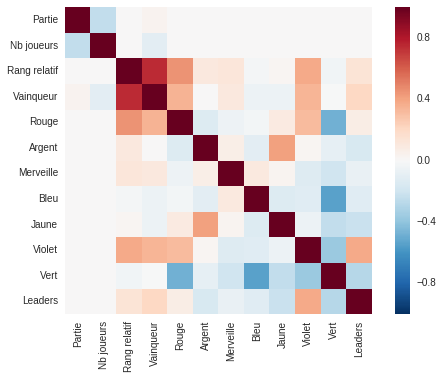

In [47]:
import seaborn as sns

_ = sns.heatmap(df.corr(), square = True)

Nombres de parties: 68


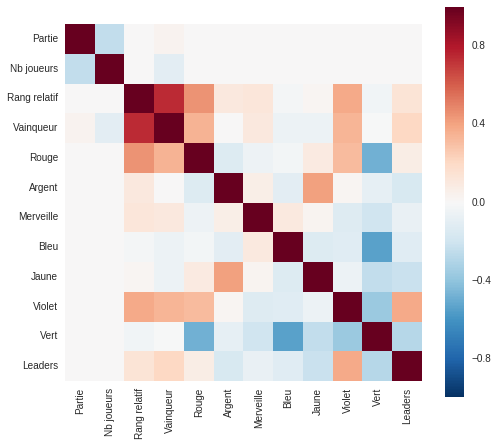

In [50]:
from IPython.html.widgets import interact

mx = df.Partie.max()
print(mx)
Villes = tuple(df.Ville.unique())

@interact
def plot(ville = Villes):

    if ville == "none":
        figsize(8, 7)
        print("Nombres de parties: %d" % len(df.Partie.unique()))
        _ = sns.heatmap(df[cols].corr(), square = True)

    else:
        figsize(16, 7)
        f, axs = plt.subplots(1, 2)
        
        for cote, ax in zip(["a", "b"], axs):
            cette_ville = (df.Ville == ville) & (df["Côté"] == cote)
            
            _ = sns.heatmap(df[cette_ville][cols].corr(), 
                            square=True, 
                            ax=ax)
            
            ax.set_title("Côté: %s\n" % cote + 
                         "Gagnées / total: %d / %d\n" % (
                            (cette_ville & df.Vainqueur).sum(),
                            (cette_ville).sum()) +
                         "Moyenne: %.2f" % (- df[cette_ville]["Rang relatif"].mean()))